In [59]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import scipy.stats as stats
df2=pd.read_csv("july 18-june 19 (1).csv",skiprows=[0,1],skipfooter=1,header=1)
df2

C:\Users\SR-19\AppData\Local\Temp\ipykernel_4808\165723301.py:11: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support skipfooter; you can avoid this warning by specifying engine='python'.
  df2=pd.read_csv("july 18-june 19 (1).csv",skiprows=[0,1],skipfooter=1,header=1)


SI.No.    Consumer Name Reading DateTime  Temperature(C)  VPV1(V)  \
0           1  Dr. J. Ramkumar  6/30/2019 23:07             4.6      0.0   
1           2  Dr. J. Ramkumar  6/30/2019 23:00             4.6      0.0   
2           3  Dr. J. Ramkumar  6/30/2019 22:52             4.6      0.0   
3           4  Dr. J. Ramkumar  6/30/2019 22:45             4.6      0.0   
4           5  Dr. J. Ramkumar  6/30/2019 22:37             4.6      0.0   
...       ...              ...              ...             ...      ...   
30273   30274  Dr. J. Ramkumar    7/1/2018 0:35             4.6      0.0   
30274   30275  Dr. J. Ramkumar    7/1/2018 0:27             4.6      0.0   
30275   30276  Dr. J. Ramkumar    7/1/2018 0:20             4.6      0.0   
30276   30277  Dr. J. Ramkumar    7/1/2018 0:12             4.6      0.0   
30277   30278  Dr. J. Ramkumar    7/1/2018 0:05             4.6      0.0   

       VPV2(V)  Reserved 1  IPV1(A)  IPV2(A)  Reserved 2  ...  \
0          0.0           0      0.0      0.0           0  ...   
1          0.0           0      0.0      0.0           0  ...   
2          0.0           0      0.0      0.0           0  ...   
3          0.0           0      0.0      0.0           0  ...   
4          0.0           0      0.0      0.0           0  ...   
...        ...         ...      ...      ...         ...  ...   
30273      0.0           0      0.0      0.0           0  ...   
30274      0.0           0      0.0      0.0           0  ...   
30275      0.0           0      0.0      0.0           0  ...   
30276      0.0           0      0.0      0.0           0  ...   
30277      0.0           0      0.0      0.0           0  ...   

       Third Error Time H  Third Error Time L  Fourth Error H  Fourth Error L  \
0                       0                   0               0               0   
1                       0                   0               0               0   
2                       0                   0               0               0   
3                       0                   0               0               0   
4                       0                   0               0               0   
...                   ...                 ...             ...             ...   
30273                   0                   0               0               0   
30274                   0                   0               0               0   
30275                   0                   0               0               0   
30276                   0                   0               0               0   
30277                   0                   0               0               0   

       Fourth Error Time H  Fourth Error Time L  Fifth Error H  Fifth Error L  \
0                        0                    0              0              0   
1                        0                    0              0              0   
2                        0                    0              0              0   
3                        0                    0              0              0   
4                        0                    0              0              0   
...                    ...                  ...            ...            ...   
30273                    0                    0              0              0   
30274                    0                    0              0              0   
30275                    0                    0              0              0   
30276                    0                    0              0              0   
30277                    0                    0              0              0   

       Fifth Error Time H  Fifth Error Time L  
0                       0                   0  
1                       0                   0  
2                       0                   0  
3                       0                   0  
4                       0                   0  
...                   ...                 ...  
30273                   0      

In [60]:
df2.shape

(30278, 60)

In [61]:
df2['Reading DateTime']=pd.to_datetime(df2['Reading DateTime'])
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30278 entries, 0 to 30277
Data columns (total 60 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   SI.No.                    30278 non-null  int64         
 1   Consumer Name             30278 non-null  object        
 2   Reading DateTime          30278 non-null  datetime64[ns]
 3   Temperature(C)            30278 non-null  float64       
 4   VPV1(V)                   30278 non-null  float64       
 5   VPV2(V)                   30278 non-null  float64       
 6   Reserved 1                30278 non-null  int64         
 7   IPV1(A)                   30278 non-null  float64       
 8   IPV2(A)                   30278 non-null  float64       
 9   Reserved 2                30278 non-null  int64         
 10  IAC(A)                    30278 non-null  float64       
 11  CUR AC S PH               30278 non-null  int64         
 12  CUR AC T PH       

In [62]:
df2.columns.to_list()

['SI.No.',
 'Consumer Name',
 'Reading DateTime',
 'Temperature(C)',
 'VPV1(V)',
 'VPV2(V)',
 'Reserved 1',
 'IPV1(A)',
 'IPV2(A)',
 'Reserved 2',
 'IAC(A)',
 'CUR AC S PH',
 'CUR AC T PH',
 'VAC(V)',
 'VOL AC S PH',
 'VOL AC T PH',
 'PPV1(W)',
 'PPV2(W)',
 'PDC(W)',
 'FREQ(Hz)',
 'PAC(W)',
 'Power AC S PH',
 'Power AC T PH',
 'Reserved 3',
 'Reserved 4',
 'E-TODAY(kWh)',
 'Energy Total H',
 'Energy Total L',
 'E-Total(MWh)',
 'Operation Hour Total H',
 'Operation Hour Total L',
 'Operation Mode',
 'GridVOL FaultValue',
 'GridFreq FaultValue',
 'GridImpedance FaultValue',
 'Temperature FaultValue',
 'PV FaultValue',
 'GFCI FaultValue',
 'Error Message H',
 'Error Message L',
 'First Error H',
 'First Error L',
 'First Error Time H',
 'First Error Time L',
 'Second Error H',
 'Second Error L',
 'Second Error Time H',
 'Second Error Time L',
 'Third Error H',
 'Third Error L',
 'Third Error Time H',
 'Third Error Time L',
 'Fourth Error H',
 'Fourth Error L',
 'Fourth Error Time H',
 'Fo

In [63]:
set(df2['E-TODAY(kWh)'])

{0.0,
 1.25,
 1.0,
 3.25,
 4.0,
 5.82,
 1.75,
 6.0,
 1.5,
 6.75,
 10.96,
 0.5,
 7.5,
 13.98,
 7.75,
 15.16,
 15.73,
 15.75,
 9.75,
 19.25,
 19.24,
 19.78,
 20.33,
 14.25,
 16.03,
 16.75,
 17.25,
 18.97,
 19.28,
 20.28,
 5.75,
 6.25,
 5.25,
 5.0,
 0.25,
 6.5,
 7.25,
 7.0,
 0.75,
 8.5,
 8.0,
 8.25,
 8.75,
 9.5,
 9.25,
 9.0,
 10.0,
 10.25,
 10.5,
 10.75,
 11.5,
 11.25,
 2.0,
 2.25,
 2.75,
 12.75,
 12.5,
 12.0,
 11.0,
 11.75,
 13.5,
 13.25,
 13.75,
 13.0,
 12.25,
 14.0,
 14.75,
 14.5,
 15.5,
 15.25,
 15.0,
 3.5,
 3.75,
 16.0,
 3.0,
 16.5,
 17.0,
 17.5,
 17.75,
 4.47,
 5.72,
 18.0,
 18.25,
 5.22,
 4.97,
 6.22,
 19.0,
 6.97,
 18.75,
 18.5,
 7.97,
 7.72,
 20.25,
 20.0,
 7.47,
 19.5,
 4.5,
 4.25,
 4.75,
 21.0,
 21.25,
 21.75,
 22.25,
 22.75,
 22.0,
 23.0,
 23.5,
 24.5,
 24.75,
 5.5,
 8.19,
 8.44,
 8.94,
 9.69,
 9.44,
 9.94,
 9.19,
 10.94,
 10.19,
 10.69,
 10.44,
 11.19,
 11.44,
 11.94,
 11.69,
 12.19,
 12.69,
 12.94,
 12.44,
 13.94,
 13.69,
 13.44,
 13.19,
 14.69,
 14.44,
 14.94,
 14.19,
 15.4

In [64]:
df2.isnull().sum()

SI.No.                      0
Consumer Name               0
Reading DateTime            0
Temperature(C)              0
VPV1(V)                     0
VPV2(V)                     0
Reserved 1                  0
IPV1(A)                     0
IPV2(A)                     0
Reserved 2                  0
IAC(A)                      0
CUR AC S PH                 0
CUR AC T PH                 0
VAC(V)                      0
VOL AC S PH                 0
VOL AC T PH                 0
PPV1(W)                     0
PPV2(W)                     0
PDC(W)                      0
FREQ(Hz)                    0
PAC(W)                      0
Power AC S PH               0
Power AC T PH               0
Reserved 3                  0
Reserved 4                  0
E-TODAY(kWh)                0
Energy Total H              0
Energy Total L              0
E-Total(MWh)                0
Operation Hour Total H      0
Operation Hour Total L      0
Operation Mode              0
GridVOL FaultValue          0
GridFreq F

In [65]:
df2.duplicated().sum()

0

In [19]:
pip install pandas-profiling

Note: you may need to restart the kernel to use updated packages.


In [20]:
from pandas_profiling import ProfileReport

C:\Users\SR-19\AppData\Local\Temp\ipykernel_5680\2274191625.py:1: DeprecationWarning: `import pandas_profiling` is going to be deprecated by April 1st. Please use `import ydata_profiling` instead.
  from pandas_profiling import ProfileReport


In [23]:
prof1=ProfileReport(df2,title='EDA of df2 BY PANDAS PROFILING REPORT',explorative=True)

In [25]:
prof1.to_file(output_file="EDA df2.html")

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [66]:
df2.describe()

SI.No.  Temperature(C)       VPV1(V)       VPV2(V)  Reserved 1  \
count  30278.000000    30278.000000  30278.000000  30278.000000     30278.0   
mean   15139.500000       29.411827    159.512464    158.704010         0.0   
std     8740.650062       24.264198    138.053994    137.619823         0.0   
min        1.000000        0.000000      0.000000      0.000000         0.0   
25%     7570.250000        4.600000      0.000000      0.000000         0.0   
50%    15139.500000       32.800000    255.200000    252.000000         0.0   
75%    22708.750000       48.800000    277.600000    281.000000         0.0   
max    30278.000000      250.000000    355.600000    356.400000         0.0   

            IPV1(A)       IPV2(A)  Reserved 2        IAC(A)  CUR AC S PH  ...  \
count  30278.000000  30278.000000     30278.0  30278.000000      30278.0  ...   
mean       1.540323      1.380421         0.0      3.214529          0.0  ...   
std        2.227782      2.100901         0.0      4.600089          0.0  ...   
min        0.000000      0.000000         0.0      0.000000          0.0  ...   
25%        0.000000      0.000000         0.0      0.000000          0.0  ...   
50%        0.200000      0.100000         0.0      0.800000          0.0  ...   
75%        2.300000      1.800000         0.0      4.800000          0.0  ...   
max        9.500000      9.100000         0.0     19.900000          0.0  ...   

       Third Error Time H  Third Error Time L  Fourth Error H  Fourth Error L  \
count        30278.000000        30278.000000     30278.00000    30278.000000   
mean             0.012782            0.457362         0.78780        1.220688   
std              1.284022           45.946083        79.14153      122.629060   
min              0.000000            0.000000         0.00000        0.000000   
25%              0.000000            0.000000         0.00000        0.000000   
50%              0.000000            0.000000         0.00000        0.000000   
75%              0.000000            0.000000         0.00000        0.000000   
max            129.000000         4616.000000      7951.00000    12320.000000   

       Fourth Error Time H  Fourth Error Time L  Fifth Error H  Fifth Error L  \
count         30278.000000         30278.000000   30278.000000   30278.000000   
mean              0.012782             0.457263       0.762435       0.764317   
std               1.284022            45.936129      76.593394      76.782514   
min               0.000000             0.000000       0.000000       0.000000   
25%               0.000000             0.000000       0.000000       0.000000   
50%               0.000000             0.000000       0.000000       0.000000   
75%               0.000000             0.000000       0.000000       0.000000   
max             129.000000          4615.000000    7695.000000    7714.000000   

       Fifth Error Time H  Fifth Error Time L  
count        30278.000000        30278.000000  
mean             0.012782            0.457263  
std              1.284022           45.936129  
min              0.000000            0.000000  
25%              0.000000            0.000000  
50%              0.000000            0.000000  
75%              0.000000            0.000000  
max            129.000000         4615.000000  

[8 rows x 58 columns]

In [67]:
df2.corr()

C:\Users\SR-19\AppData\Local\Temp\ipykernel_4808\1778878097.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df2.corr()


SI.No.  Temperature(C)   VPV1(V)   VPV2(V)  \
SI.No.                    1.000000       -0.171839 -0.068380 -0.066266   
Temperature(C)           -0.171839        1.000000  0.836879  0.832094   
VPV1(V)                  -0.068380        0.836879  1.000000  0.994900   
VPV2(V)                  -0.066266        0.832094  0.994900  1.000000   
Reserved 1                     NaN             NaN       NaN       NaN   
IPV1(A)                  -0.047931        0.747268  0.533817  0.522881   
IPV2(A)                  -0.046379        0.747920  0.508982  0.486459   
Reserved 2                     NaN             NaN       NaN       NaN   
IAC(A)                   -0.070449        0.762742  0.544901  0.529191   
CUR AC S PH                    NaN             NaN       NaN       NaN   
CUR AC T PH                    NaN             NaN       NaN       NaN   
VAC(V)                   -0.095563        0.878031  0.990147  0.988080   
VOL AC S PH                    NaN             NaN       NaN       NaN   
VOL AC T PH                    NaN             NaN       NaN       NaN   
PPV1(W)                  -0.038728        0.752161  0.550918  0.537798   
PPV2(W)                  -0.037276        0.759898  0.527773  0.510641   
PDC(W)                   -0.038287        0.760897  0.543448  0.528310   
FREQ(Hz)                 -0.076202        0.871205  0.991703  0.989795   
PAC(W)                   -0.057541        0.755436  0.532209  0.516625   
Power AC S PH                  NaN             NaN       NaN       NaN   
Power AC T PH                  NaN             NaN       NaN       NaN   
Reserved 3                     NaN             NaN       NaN       NaN   
Reserved 4                     NaN             NaN       NaN       NaN   
E-TODAY(kWh)             -0.111106        0.175144  0.004311  0.005778   
Energy Total H            0.705870       -0.042187  0.009030  0.018312   
Energy Total L            0.052311        0.104979  0.078529  0.089636   
E-Total(MWh)              0.567632       -0.004922  0.028150  0.038410   
Operation Hour Total H         NaN             NaN       NaN       NaN   
Operation Hour Total L   -0.979401        0.192500  0.083642  0.082954   
Operation Mode           -0.044858        0.806973  0.883151  0.880384   
GridVOL FaultValue             NaN             NaN       NaN       NaN   
GridFreq FaultValue            NaN             NaN       NaN       NaN   
GridImpedance FaultValue       NaN             NaN       NaN       NaN   
Temperature FaultValue         NaN             NaN       NaN       NaN   
PV FaultValue                  NaN             NaN       NaN       NaN   
GFCI FaultValue                NaN             NaN       NaN       NaN   
Error Message H          -0.044352        0.019000  0.063689  0.063728   
Error Message L                NaN             NaN       NaN       NaN   
First Error H             0.009991       -0.010179 -0.011502 -0.011480   
First Error L             0.009991       -0.010179 -0.011502 -0.011480   
First Error Time H        0.009991       -0.010179 -0.011502 -0.011480   
First Error Time L        0.009991       -0.010179 -0.011502 -0.011480   
Second Error H            0.009991       -0.010179 -0.011502 -0.011480   
Second Error L            0.009991       -0.010179 -0.011502 -0.011480   
Second Error Time H       0.009991       -0.010179 -0.011502 -0.011480   
Second Error Time L       0.009991       -0.010179 -0.011502 -0.011480   
Third Error H             0.009991       -0.010179 -0.011502 -0.011480   
Third Error L             0.009991       -0.010179 -0.011502 -0.011480   
Third Error Time H        0.009991       -0.010179 -0.011502 -0.011480   
Third Error Time L        0.009991       -0.010179 -0.011502 -0.011480   
Fourth Error H            0.009991       -0.010179 -0.011502 -0.011480   
Fourth Error L            0.009991       -0.010179 -0.011502 -0.011480   
Fourth Error Time H       0.009991       -0.010179 -0.011502 -0.011480   
Fourth Error Time L       0.0099

In [68]:
df2.corr()['E-TODAY(kWh)']

C:\Users\SR-19\AppData\Local\Temp\ipykernel_4808\2289895616.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df2.corr()['E-TODAY(kWh)']


SI.No.                     -0.111106
Temperature(C)              0.175144
VPV1(V)                     0.004311
VPV2(V)                     0.005778
Reserved 1                       NaN
IPV1(A)                     0.066476
IPV2(A)                     0.120384
Reserved 2                       NaN
IAC(A)                      0.104567
CUR AC S PH                      NaN
CUR AC T PH                      NaN
VAC(V)                      0.032603
VOL AC S PH                      NaN
VOL AC T PH                      NaN
PPV1(W)                     0.065174
PPV2(W)                     0.129263
PDC(W)                      0.096456
FREQ(Hz)                    0.035615
PAC(W)                      0.100556
Power AC S PH                    NaN
Power AC T PH                    NaN
Reserved 3                       NaN
Reserved 4                       NaN
E-TODAY(kWh)                1.000000
Energy Total H             -0.113409
Energy Total L             -0.051547
E-Total(MWh)               -0.102773
O

In [69]:
df2.columns

Index(['SI.No.', 'Consumer Name', 'Reading DateTime', 'Temperature(C)',
       'VPV1(V)', 'VPV2(V)', 'Reserved 1', 'IPV1(A)', 'IPV2(A)', 'Reserved 2',
       'IAC(A)', 'CUR AC S PH', 'CUR AC T PH', 'VAC(V)', 'VOL AC S PH',
       'VOL AC T PH', 'PPV1(W)', 'PPV2(W)', 'PDC(W)', 'FREQ(Hz)', 'PAC(W)',
       'Power AC S PH', 'Power AC T PH', 'Reserved 3', 'Reserved 4',
       'E-TODAY(kWh)', 'Energy Total H', 'Energy Total L', 'E-Total(MWh)',
       'Operation Hour Total H', 'Operation Hour Total L', 'Operation Mode',
       'GridVOL FaultValue', 'GridFreq FaultValue', 'GridImpedance FaultValue',
       'Temperature FaultValue', 'PV FaultValue', 'GFCI FaultValue',
       'Error Message H', 'Error Message L', 'First Error H', 'First Error L',
       'First Error Time H', 'First Error Time L', 'Second Error H',
       'Second Error L', 'Second Error Time H', 'Second Error Time L',
       'Third Error H', 'Third Error L', 'Third Error Time H',
       'Third Error Time L', 'Fourth Error H', 'F

In [70]:
df2.drop(columns=['Reading DateTime','SI.No.','Consumer Name','Reserved 1','Reserved 2','CUR AC S PH','CUR AC T PH','VOL AC S PH','VOL AC T PH','Power AC S PH','Power AC T PH','Reserved 3','Reserved 4','Operation Hour Total H','GridVOL FaultValue','GridFreq FaultValue','GridImpedance FaultValue','Temperature FaultValue','PV FaultValue','GFCI FaultValue','Error Message H','Error Message L','First Error H','First Error L','First Error Time H','First Error Time L','Second Error H','Second Error L','Second Error Time H','Second Error Time L','Third Error H','Third Error L','Third Error Time H','Third Error Time L','Fourth Error H','Fourth Error L','Fourth Error Time H','Fourth Error Time L','Fifth Error H','Fifth Error L','Fifth Error Time H','Fifth Error Time L','IPV2(A)','VPV2(V)','IAC(A)','PAC(W)','FREQ(Hz)','PDC(W)','Operation Mode','Energy Total H'],inplace=True)

In [71]:
df2

Temperature(C)  VPV1(V)  IPV1(A)  VAC(V)  PPV1(W)  PPV2(W)  \
0                 4.6      0.0      0.0     0.0      0.0      0.0   
1                 4.6      0.0      0.0     0.0      0.0      0.0   
2                 4.6      0.0      0.0     0.0      0.0      0.0   
3                 4.6      0.0      0.0     0.0      0.0      0.0   
4                 4.6      0.0      0.0     0.0      0.0      0.0   
...               ...      ...      ...     ...      ...      ...   
30273             4.6      0.0      0.0     0.0      0.0      0.0   
30274             4.6      0.0      0.0     0.0      0.0      0.0   
30275             4.6      0.0      0.0     0.0      0.0      0.0   
30276             4.6      0.0      0.0     0.0      0.0      0.0   
30277             4.6      0.0      0.0     0.0      0.0      0.0   

       E-TODAY(kWh)  Energy Total L  E-Total(MWh)  Operation Hour Total L  
0              0.00          2346.7        2.3467                    3042  
1             15.75          2346.7        2.3467                    3042  
2             15.75          2346.7        2.3467                    3042  
3             15.75          2346.7        2.3467                    3041  
4             15.75          2346.7        2.3467                    3041  
...             ...             ...           ...                     ...  
30273          0.00          2531.2        9.0848                       0  
30274          0.00          2531.2        9.0848                       0  
30275          0.00          2531.2        9.0848                       0  
30276          0.00          2531.2        9.0848                       0  
30277          0.00          2531.2        9.0848                       0  

[30278 rows x 10 columns]

In [72]:
df2.columns

Index(['Temperature(C)', 'VPV1(V)', 'IPV1(A)', 'VAC(V)', 'PPV1(W)', 'PPV2(W)',
       'E-TODAY(kWh)', 'Energy Total L', 'E-Total(MWh)',
       'Operation Hour Total L'],
      dtype='object')

In [73]:
df2.corr()['E-TODAY(kWh)']

Temperature(C)            0.175144
VPV1(V)                   0.004311
IPV1(A)                   0.066476
VAC(V)                    0.032603
PPV1(W)                   0.065174
PPV2(W)                   0.129263
E-TODAY(kWh)              1.000000
Energy Total L           -0.051547
E-Total(MWh)             -0.102773
Operation Hour Total L    0.107738
Name: E-TODAY(kWh), dtype: float64

In [74]:
x=df2.drop(columns=['E-TODAY(kWh)'])
y=df2['E-TODAY(kWh)']

In [75]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [76]:
x_train

Temperature(C)  VPV1(V)  IPV1(A)  VAC(V)  PPV1(W)  PPV2(W)  \
29903             4.6      0.0      0.0     0.0     0.00     0.00   
11686             4.6      0.0      0.0     0.0     0.00     0.00   
21308            40.3    290.8      2.3   238.6   668.84   583.30   
1429             44.2    273.0      1.2   242.0   327.60   306.02   
9073             61.3    267.4      2.3   238.6   615.02   608.58   
...               ...      ...      ...     ...      ...      ...   
29802            45.5    273.0      1.9   232.4   518.70   401.76   
5390             43.4    324.2      0.0   247.2     0.00     0.00   
860               4.6      0.0      0.0     0.0     0.00     0.00   
15795             4.6      0.0      0.0     0.0     0.00     0.00   
23654             4.6      0.0      0.0     0.0     0.00     0.00   

       Energy Total L  E-Total(MWh)  Operation Hour Total L  
29903          2554.0        9.1076                       0  
11686          1105.0        1.1050                    1274  
21308           208.3        0.2083                     277  
1429           2179.3        2.1793                    2806  
9073           1402.3        1.4023                    1656  
...               ...           ...                     ...  
29802          2557.4        9.1110                       0  
5390           1762.6        1.7626                    2204  
860            2222.0        2.2220                    2881  
15795           725.3        0.7253                     837  
23654            28.2        0.0282                      32  

[24222 rows x 9 columns]

In [77]:
x_test

Temperature(C)  VPV1(V)  IPV1(A)  VAC(V)  PPV1(W)  PPV2(W)  \
10370             4.6      0.0      0.0     0.0     0.00     0.00   
23034             4.6      0.0      0.0     0.0     0.00     0.00   
10986             4.6      0.0      0.0     0.0     0.00     0.00   
9701             68.2    250.2      6.6   239.0  1651.32  1550.08   
5975             49.3    236.0      5.0   245.2  1180.00   451.20   
...               ...      ...      ...     ...      ...      ...   
22710            28.3    295.2      3.1   235.4   915.12   531.00   
15104             4.6      0.0      0.0     0.0     0.00     0.00   
9755             31.1    289.6      0.0   231.2     0.00     0.00   
12553             4.6      0.0      0.0     0.0     0.00     0.00   
29247            36.4    297.6      1.4   240.2   416.64   288.80   

       Energy Total L  E-Total(MWh)  Operation Hour Total L  
10370           819.5        0.8195                    1432  
23034            75.3        0.0753                     101  
10986          1151.5        1.1515                    1346  
9701           1307.1        1.3071                    1539  
5975           1713.9        1.7139                    2133  
...               ...           ...                     ...  
22710            99.6        0.0996                     135  
15104           789.1        0.7891                     907  
9755           1300.6        1.3006                    1533  
12553          1026.3        1.0263                    1185  
29247          2609.2        9.1628                       0  

[6056 rows x 9 columns]

In [78]:
y_train

29903    12.41
11686     0.00
21308     9.15
1429     14.49
9073      9.60
         ...  
29802     3.45
5390      1.18
860       0.00
15795     0.00
23654     0.00
Name: E-TODAY(kWh), Length: 24222, dtype: float64

In [79]:
y_test

10370    20.26
23034     0.00
10986     0.00
9701      6.59
5975      2.40
         ...  
22710     2.13
15104     0.00
9755      0.00
12553     0.00
29247     0.45
Name: E-TODAY(kWh), Length: 6056, dtype: float64

C:\Users\SR-19\AppData\Local\Temp\ipykernel_5680\2080111843.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x_train[col])


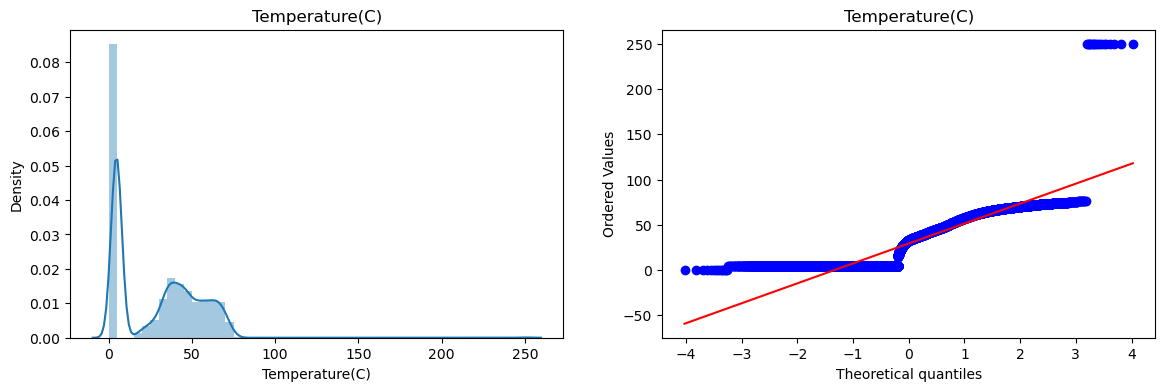

C:\Users\SR-19\AppData\Local\Temp\ipykernel_5680\2080111843.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x_train[col])


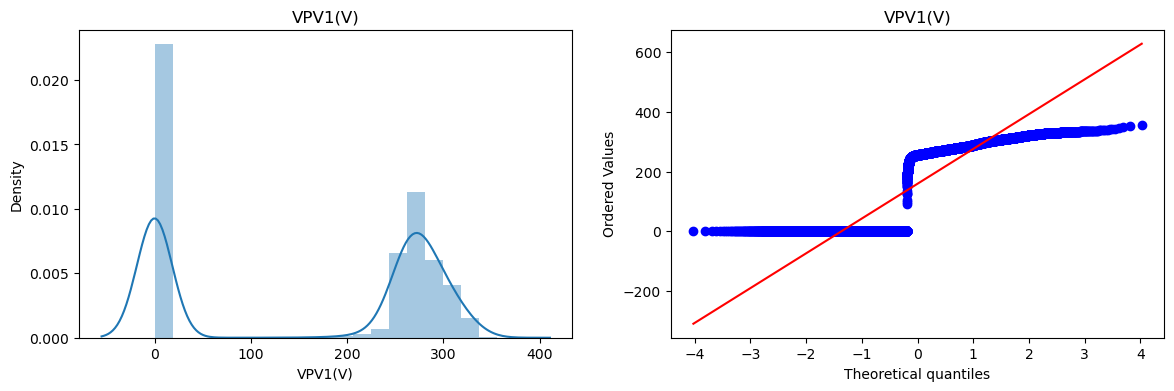

C:\Users\SR-19\AppData\Local\Temp\ipykernel_5680\2080111843.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x_train[col])


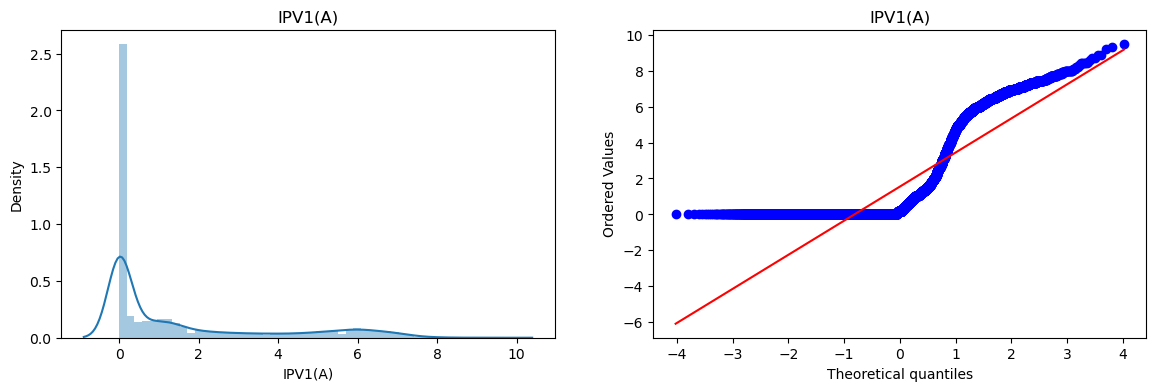

C:\Users\SR-19\AppData\Local\Temp\ipykernel_5680\2080111843.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x_train[col])


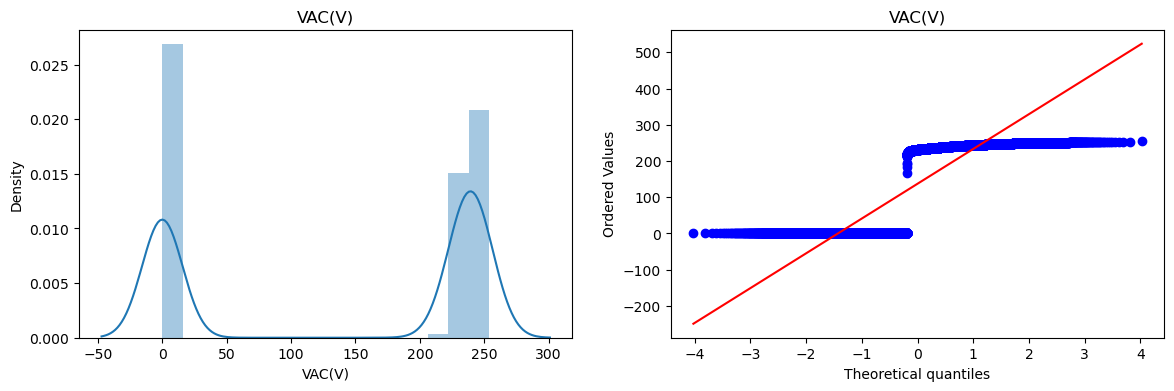

C:\Users\SR-19\AppData\Local\Temp\ipykernel_5680\2080111843.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x_train[col])


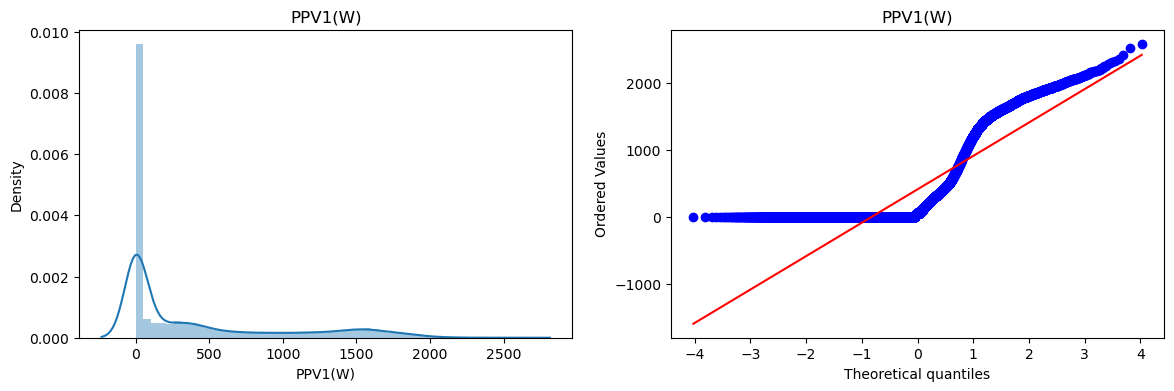

C:\Users\SR-19\AppData\Local\Temp\ipykernel_5680\2080111843.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x_train[col])


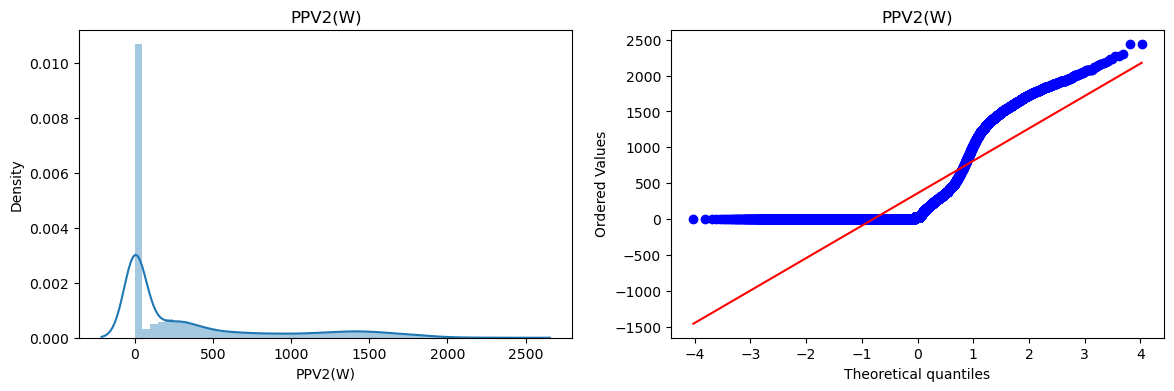

C:\Users\SR-19\AppData\Local\Temp\ipykernel_5680\2080111843.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x_train[col])


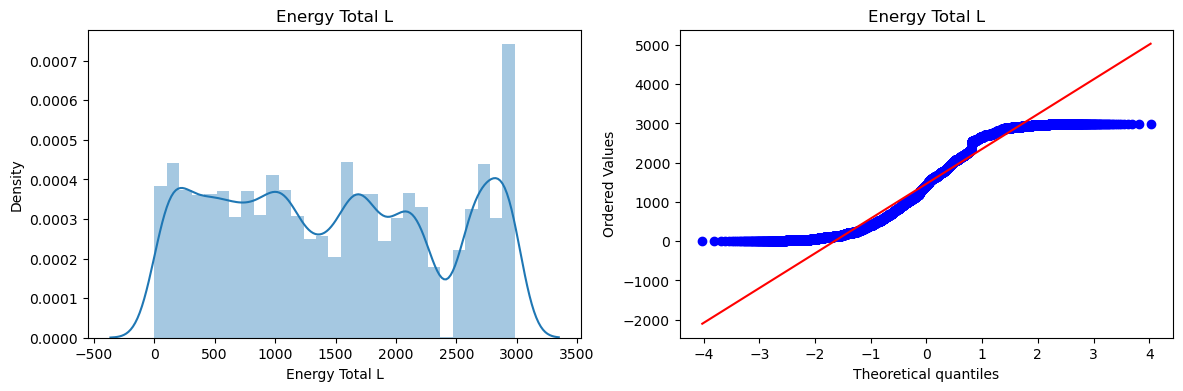

C:\Users\SR-19\AppData\Local\Temp\ipykernel_5680\2080111843.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x_train[col])


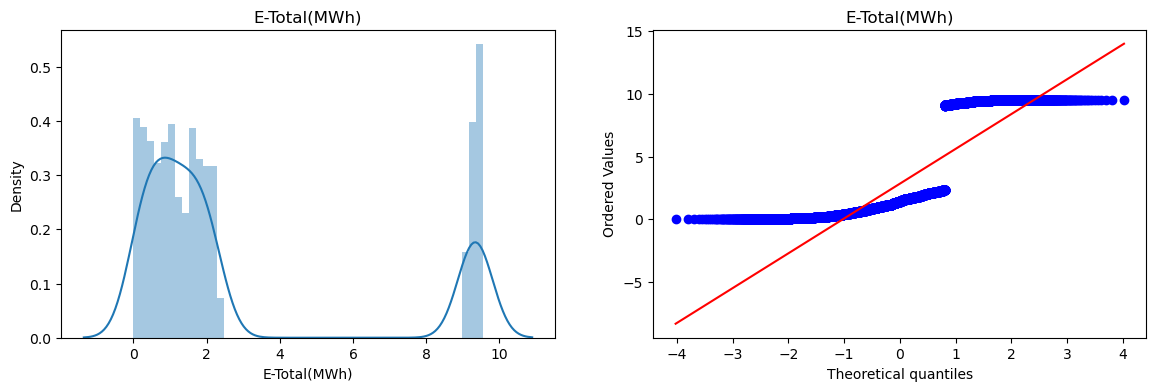

C:\Users\SR-19\AppData\Local\Temp\ipykernel_5680\2080111843.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x_train[col])


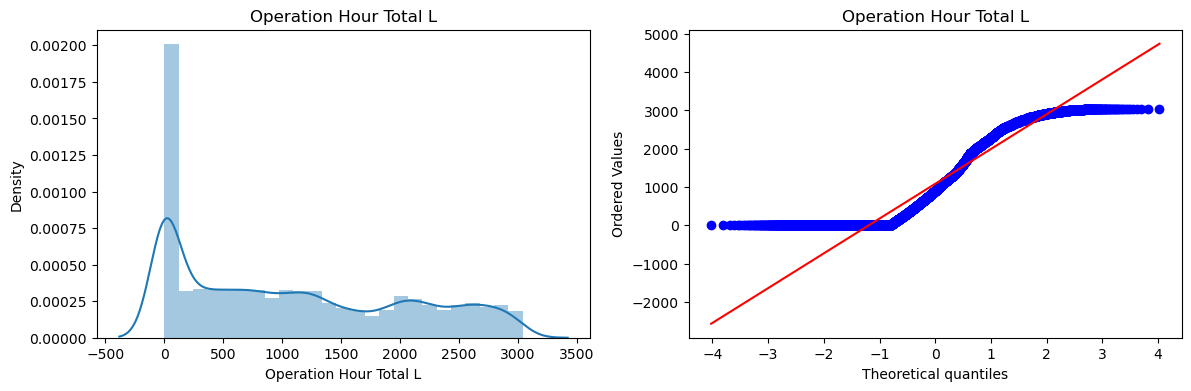

In [83]:
#check wther the column is normally distributed or not
for col in x_train.columns:
    plt.figure(figsize=(14,4))
    plt.subplot(121)
    sns.distplot(x_train[col])
    plt.title(col)
    plt.subplot(122)
    stats.probplot(x_train[col],dist='norm',plot=plt)
    plt.title(col)
    plt.show()

In [88]:
for col in x_train.columns:
    print(x_train[col].skew())

0.7174749486050656
-0.25078070016623644
1.311135194303132
-0.29405315716013974
1.2697832054715297
1.4368862869134278
0.1250272231220565
1.3145453894559964
0.45449837799247417


In [80]:
from sklearn.preprocessing import PowerTransformer
trf=PowerTransformer()
x_train_trf=trf.fit_transform(x_train)
x_test_trf=trf.transform(x_test)
x_train_trf=pd.DataFrame(x_train_trf,columns=x_train.columns)
x_test_trf=pd.DataFrame(x_test_trf,columns=x_test.columns)

C:\Users\SR-19\AppData\Local\Temp\ipykernel_5680\554862723.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x_train_trf[col])


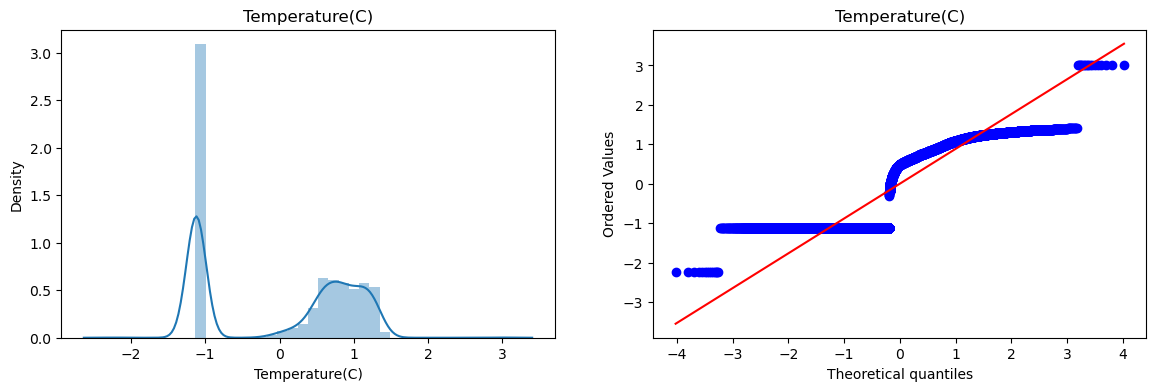

C:\Users\SR-19\AppData\Local\Temp\ipykernel_5680\554862723.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x_train_trf[col])


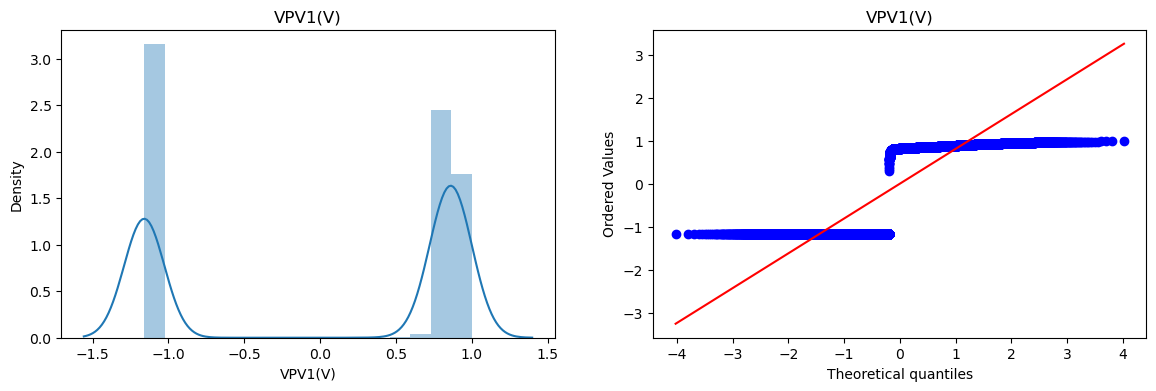

C:\Users\SR-19\AppData\Local\Temp\ipykernel_5680\554862723.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x_train_trf[col])


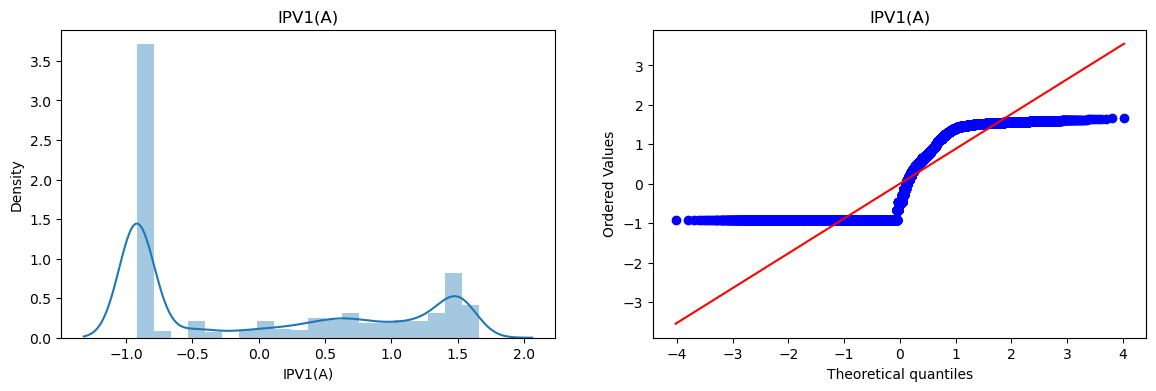

C:\Users\SR-19\AppData\Local\Temp\ipykernel_5680\554862723.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x_train_trf[col])


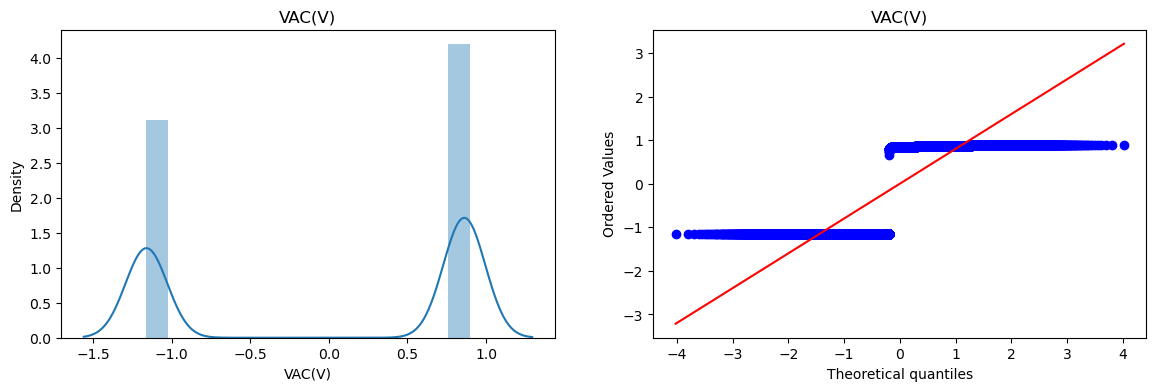

C:\Users\SR-19\AppData\Local\Temp\ipykernel_5680\554862723.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x_train_trf[col])


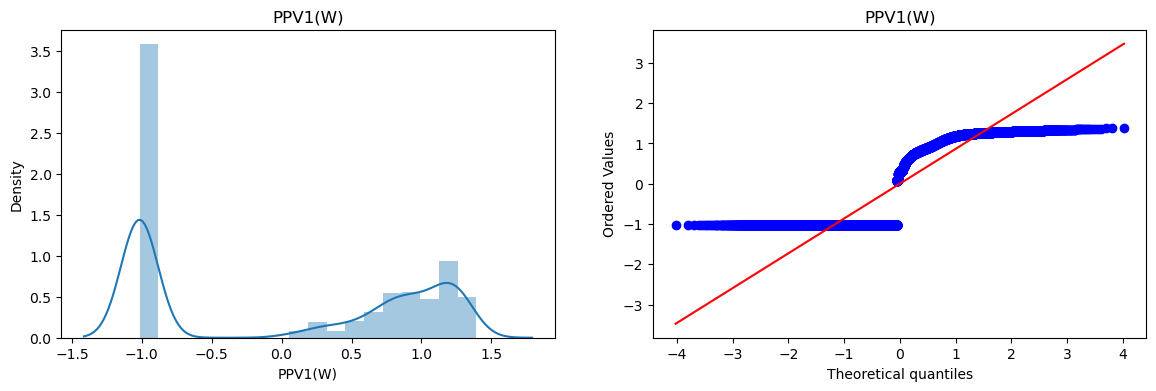

C:\Users\SR-19\AppData\Local\Temp\ipykernel_5680\554862723.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x_train_trf[col])


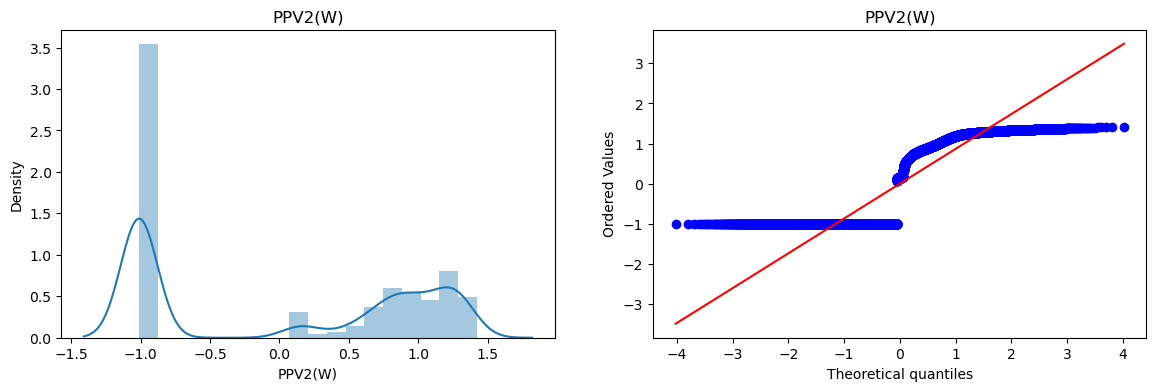

C:\Users\SR-19\AppData\Local\Temp\ipykernel_5680\554862723.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x_train_trf[col])


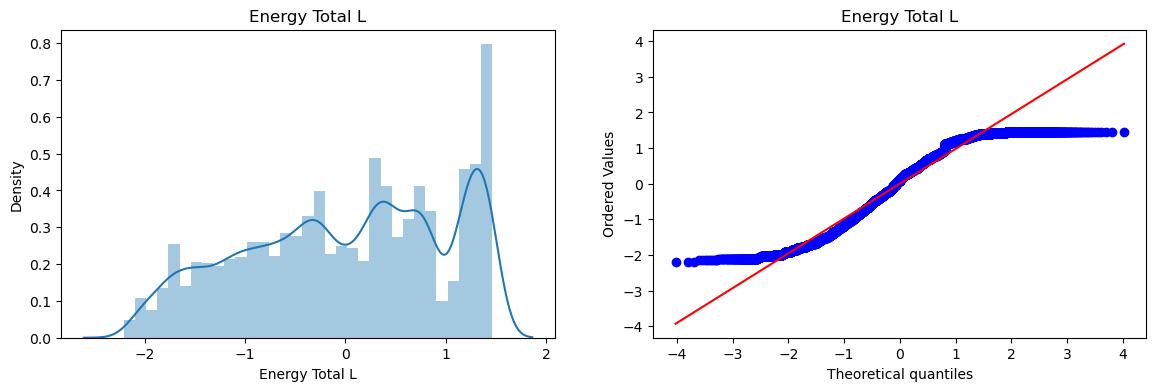

C:\Users\SR-19\AppData\Local\Temp\ipykernel_5680\554862723.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x_train_trf[col])


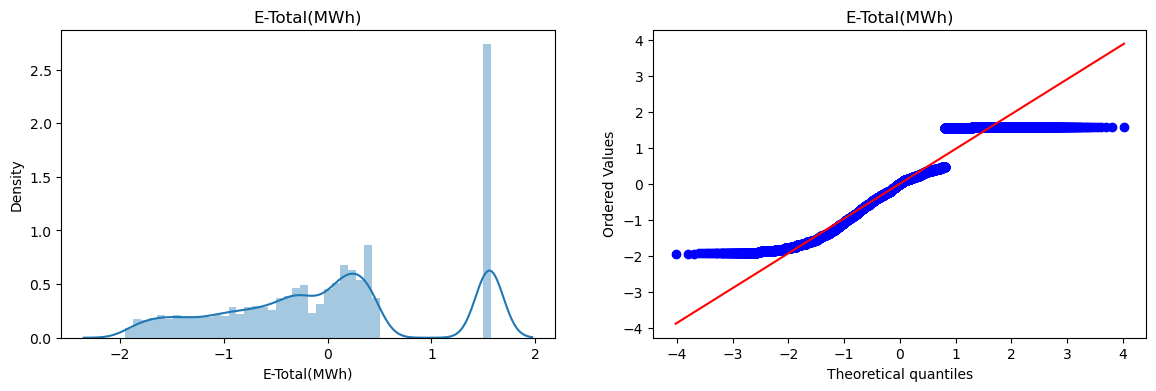

C:\Users\SR-19\AppData\Local\Temp\ipykernel_5680\554862723.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x_train_trf[col])


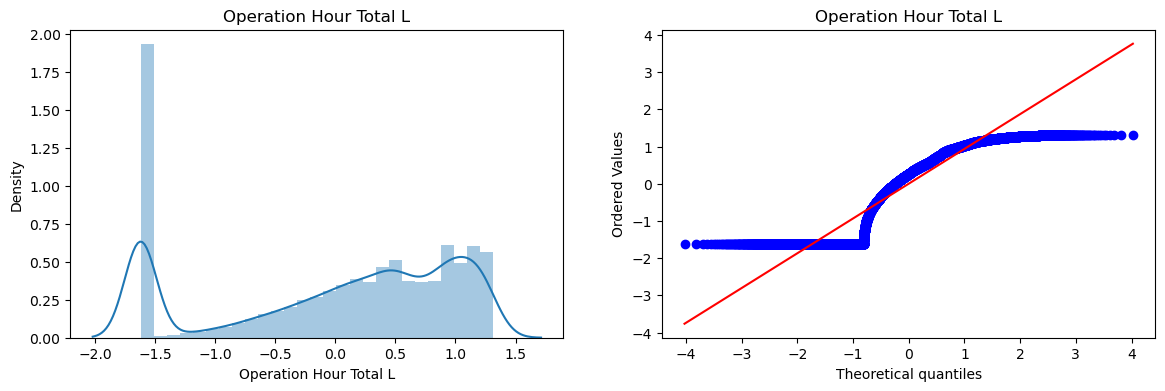

In [86]:
#check wther the column is normally distributed or not
for col in x_train_trf.columns:
    plt.figure(figsize=(14,4))
    plt.subplot(121)
    sns.distplot(x_train_trf[col])
    plt.title(col)
    plt.subplot(122)
    stats.probplot(x_train_trf[col],dist='norm',plot=plt)
    plt.title(col)
    plt.show()

In [81]:
for col in x_train_trf.columns:
    print(x_train_trf[col].skew())

-0.11574193292486486
-0.29569595324981407
0.4054498380732254
-0.2991537424076568
0.05063822401373849
0.07100349682625706
-0.26148166428258446
0.15440284399137247
-0.5513506055862004


In [82]:
df2.shape

(30278, 10)

In [83]:
from sklearn.preprocessing import StandardScaler
s= StandardScaler()
x_train_scaled=s.fit_transform(x_train_trf)
x_test_scaled=s.transform(x_test_trf)
x_train_scaled=pd.DataFrame(x_train_scaled,columns=x_train.columns)
x_test_scaled=pd.DataFrame(x_test_scaled,columns=x_test.columns)

In [84]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(x_train,y_train)

LinearRegression()

In [85]:
y_pred=lr.predict(x_test)
from sklearn.metrics import r2_score,mean_squared_error
score=r2_score(y_test,y_pred)
print("The accuracy of our model is {}%".format(round(score,2)*100))

The accuracy of our model is 19.0%


In [86]:
np.sqrt(mean_squared_error(y_test,y_pred))

7.205058222886106

In [89]:
for importance, name in sorted(zip(dt.feature_importances_, x_train.columns), reverse=True):
    print(name,importance)

Operation Hour Total L 0.3677157645469911
Temperature(C) 0.20884193788242378
Energy Total L 0.15182095273995885
PPV1(W) 0.07685505288966177
E-Total(MWh) 0.07202719150689227
VPV1(V) 0.0531185617624297
IPV1(A) 0.036430344349120854
VAC(V) 0.02257375437479291
PPV2(W) 0.010616439947728908


In [90]:
from sklearn.tree import DecisionTreeRegressor
dt=DecisionTreeRegressor()
dt.fit(x_train_scaled,y_train)

DecisionTreeRegressor()

In [91]:
y_pred2=dt.predict(x_test_scaled)
from sklearn.metrics import r2_score
score=r2_score(y_test,y_pred2)
print("The accuracy of our model is {}%".format(round(score,2)*100))

The accuracy of our model is 82.0%


In [92]:
np.sqrt(mean_squared_error(y_test,y_pred2))

3.382783385951499

In [93]:
from sklearn.ensemble import RandomForestRegressor

In [94]:
rf= RandomForestRegressor()
rf.fit(x_train_scaled,y_train)

RandomForestRegressor()

In [95]:
y_pred3=rf.predict(x_test_scaled)
from sklearn.metrics import r2_score
score=r2_score(y_test,y_pred3)
print("The accuracy of our model is {}%".format(round(score,2)*100))

The accuracy of our model is 84.0%


In [96]:
np.sqrt(mean_squared_error(y_test,y_pred3))

3.1584341879206907

In [97]:
from sklearn.neighbors import KNeighborsRegressor
knn= KNeighborsRegressor(n_neighbors=3)
knn.fit(x_train_scaled,y_train)
y_pred4=knn.predict(x_test_scaled)
score=r2_score(y_test,y_pred4)
print("The accuracy of our model is {}%".format(round(score,2)*100))

The accuracy of our model is 80.0%


In [98]:
np.sqrt(mean_squared_error(y_test,y_pred4))

3.590628741142017

In [99]:
y_test= y_test.values.reshape(1,6056)

In [100]:
y_pred=pd.DataFrame(y_pred)

In [102]:
cross_checking = pd.DataFrame({'Actual' : y_test.flatten() , 'Predicted' : y_pred3.flatten()})
cross_checking

Actual  Predicted
0      20.26  20.260000
1       0.00   5.799102
2       0.00   0.000000
3       6.59   6.461400
4       2.40   2.519500
...      ...        ...
6051    2.13   1.843700
6052    0.00   0.000000
6053    0.00   0.001400
6054    0.00   0.000000
6055    0.45   0.694300

[6056 rows x 2 columns]

In [107]:
cross_checking['Error'] = cross_checking['Actual'] - cross_checking['Predicted']
cross_checking

Actual  Predicted         Error
0      20.26  20.260000  7.105427e-15
1       0.00   5.799102 -5.799102e+00
2       0.00   0.000000  0.000000e+00
3       6.59   6.461400  1.286000e-01
4       2.40   2.519500 -1.195000e-01
...      ...        ...           ...
6051    2.13   1.843700  2.863000e-01
6052    0.00   0.000000  0.000000e+00
6053    0.00   0.001400 -1.400000e-03
6054    0.00   0.000000  0.000000e+00
6055    0.45   0.694300 -2.443000e-01

[6056 rows x 3 columns]

In [108]:
cross_checking_final  = cross_checking[cross_checking['Error'] >= 2]
cross_checking_final.sample(50).style.background_gradient(cmap='coolwarm').set_properties(**{'font-family': 'Lucida Calligraphy','color': 'LigntGreen','font-size': '15px'})

In [109]:
cross_checking_final

Actual  Predicted      Error
26     15.67   3.604600  12.065400
35      8.23   5.176447   3.053553
54     11.41   7.583900   3.826100
65     19.21   7.109485  12.100515
67      7.40   2.870717   4.529283
...      ...        ...        ...
6012   12.07   8.347011   3.722989
6029   13.45  11.009600   2.440400
6037    9.38   3.483047   5.896953
6039   15.31   5.839570   9.470430
6046   11.79   4.387645   7.402355

[536 rows x 3 columns]

In [174]:
(515/6056)*100

8.503963011889036

In [ ]:
#max accuracy of 85% by random forest